In [148]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_classification, make_regression
from sklearn.linear_model import LinearRegression, Lasso, RidgeCV, LassoCV, Ridge, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import GradientBoostingClassifier

from scipy import stats

pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 500)

In [274]:
df = pd.read_csv('./data/kaggle/stroke.csv') 

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [208]:
df.shape

(40910, 11)

In [209]:
# age convertion for modelling
df['age_range'] = None
df.loc[df['age'] < 18, 'age_range']= '<18'
df.loc[(df['bmi'] >= 18) & (df['bmi'] <= 30) ,'age_range']= '18-30' 
df.loc[(df['bmi'] >= 30) & (df['bmi'] <= 40),'age_range']= '30-40' 
df.loc[(df['bmi'] >= 40) & (df['bmi'] <= 50),'age_range']= '40-50' 
df.loc[(df['bmi'] >= 50) & (df['bmi'] <= 60),'age_range']= '50-60 '
df.loc[(df['bmi'] > 60),'age_range']= '>60' 

df.age_range.value_counts()

18-30     21793
30-40     14825
40-50      3471
50-60       400
>60          55
<18          29
Name: age_range, dtype: int64

In [210]:
df['sex'].value_counts()

1.0    22710
0.0    18197
Name: sex, dtype: int64

In [174]:
df['sex'] = df['sex'].map({1:'Yes',0:'No'})
df.sex.value_counts()

Yes    22710
No     18197
Name: sex, dtype: int64

In [211]:
df['hypertension'].value_counts()

0    32162
1     8748
Name: hypertension, dtype: int64

In [176]:
df['hypertension'] = df['hypertension'].map({1:'Yes',0:'No'})
df.hypertension.value_counts()

No     32162
Yes     8748
Name: hypertension, dtype: int64

In [177]:
df['heart_disease'].value_counts()

0    35685
1     5225
Name: heart_disease, dtype: int64

In [178]:
df['heart_disease'] = df['heart_disease'].map({1:'Yes',0:'No'})
df.heart_disease.value_counts()

No     35685
Yes     5225
Name: heart_disease, dtype: int64

In [179]:
df['ever_married'].value_counts()

1    33601
0     7309
Name: ever_married, dtype: int64

In [180]:
df['ever_married'] = df['ever_married'].map({1:'Yes',0:'No'})
df.ever_married.value_counts()

Yes    33601
No      7309
Name: ever_married, dtype: int64

In [181]:
df['work_type'].value_counts()

4    25570
3     9236
2     5588
1      431
0       85
Name: work_type, dtype: int64

In [182]:
df['stroke'].value_counts()

1    20460
0    20450
Name: stroke, dtype: int64

In [183]:
df['stroke'] = df['stroke'].map({1:'Yes',0:'No'})
df.stroke.value_counts()

Yes    20460
No     20450
Name: stroke, dtype: int64

In [184]:
df['Residence_type'].value_counts()

1    21064
0    19846
Name: Residence_type, dtype: int64

In [185]:
df['smoking_status'].value_counts()

0    20921
1    19989
Name: smoking_status, dtype: int64

In [186]:
df['smoking_status'] = df['smoking_status'].map({1:'Yes',0:'No'})
df.smoking_status.value_counts()

No     20921
Yes    19989
Name: smoking_status, dtype: int64

In [187]:
df['avg_glucose_level'].value_counts()

76.57     144
104.12    142
231.56    142
80.13     140
250.89    136
         ... 
88.88       4
196.81      4
59.43       4
125.26      4
61.88       4
Name: avg_glucose_level, Length: 2903, dtype: int64

In [188]:
# avg_glucose convertion for modelling
df['avg_glucose_range'] = None
df.loc[df['avg_glucose_level'] < 80, 'avg_glucose_range']= 'low'  # low
df.loc[(df['avg_glucose_level'] >= 80) & (df['avg_glucose_level'] <= 100) ,'avg_glucose_range']= 'Normal' # Normal
df.loc[(df['avg_glucose_level'] >= 101) & (df['avg_glucose_level'] <= 125),'avg_glucose_range']= 'Impaired' # Impaired
df.loc[(df['avg_glucose_level'] > 125),'avg_glucose_range']= 'diabetic' # diabetic

df.avg_glucose_range.value_counts()

diabetic    12933
low         10977
Normal      10227
Impaired     6393
Name: avg_glucose_range, dtype: int64

In [212]:
# BMI convertion for modelling
df['bmi_range'] = None
df.loc[df['bmi'] < 18.5, 'bmi_range']= 'Underweight'
df.loc[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.9) ,'bmi_range']= 'Normal' # Normal
df.loc[(df['bmi'] >= 25) & (df['bmi'] <= 29.9),'bmi_range']= 'Overweight' # Overweight
df.loc[(df['bmi'] > 30),'bmi_range']= 'Obese' # Obese

df.bmi_range.value_counts()

Obese          18403
Overweight     13771
Normal          7967
Underweight      421
Name: bmi_range, dtype: int64

In [190]:
df = df.dropna()

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39842 entries, 0 to 40909
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                39842 non-null  object 
 1   age                39842 non-null  float64
 2   hypertension       39842 non-null  object 
 3   heart_disease      39842 non-null  object 
 4   ever_married       39842 non-null  object 
 5   work_type          39842 non-null  int64  
 6   Residence_type     39842 non-null  int64  
 7   avg_glucose_level  39842 non-null  float64
 8   bmi                39842 non-null  float64
 9   smoking_status     39842 non-null  object 
 10  stroke             39842 non-null  object 
 11  age_range          39842 non-null  object 
 12  avg_glucose_range  39842 non-null  object 
 13  bmi_range          39842 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 4.6+ MB


In [214]:
df_easy = df[['age', 'bmi_range', 'hypertension']]

In [215]:
df_easy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           40910 non-null  float64
 1   bmi_range     40562 non-null  object 
 2   hypertension  40910 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 959.0+ KB


In [216]:
df_easy = df_easy.dropna()

In [217]:
df_easy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40562 entries, 0 to 40909
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           40562 non-null  float64
 1   bmi_range     40562 non-null  object 
 2   hypertension  40562 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ MB


In [69]:
df_try = df[['sex', 'age_range', 'hypertension', 'heart_disease', 'stroke', 'ever_married', 'bmi_range', 
            'avg_glucose_range']]

In [70]:
df_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39842 entries, 0 to 40909
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                39842 non-null  object
 1   age_range          39842 non-null  object
 2   hypertension       39842 non-null  object
 3   heart_disease      39842 non-null  object
 4   stroke             39842 non-null  object
 5   ever_married       39842 non-null  object
 6   bmi_range          39842 non-null  object
 7   avg_glucose_range  39842 non-null  object
dtypes: object(8)
memory usage: 2.7+ MB


In [71]:
df_enc = pd.get_dummies(df_try, columns = ['sex', 'age_range', 'hypertension', 'heart_disease', 'stroke', 'ever_married', 'bmi_range', 
            'avg_glucose_range'])

In [72]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39842 entries, 0 to 40909
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   sex_No                      39842 non-null  uint8
 1   sex_Yes                     39842 non-null  uint8
 2   age_range_18-30             39842 non-null  uint8
 3   age_range_30-40             39842 non-null  uint8
 4   age_range_40-50             39842 non-null  uint8
 5   age_range_50-60             39842 non-null  uint8
 6   age_range_<18               39842 non-null  uint8
 7   age_range_>60               39842 non-null  uint8
 8   hypertension_No             39842 non-null  uint8
 9   hypertension_Yes            39842 non-null  uint8
 10  heart_disease_No            39842 non-null  uint8
 11  heart_disease_Yes           39842 non-null  uint8
 12  stroke_No                   39842 non-null  uint8
 13  stroke_Yes                  39842 non-null  uint8
 14  ever_m

In [ ]:
df_try = df[['sex', 'age_range', 'hypertension', 'heart_disease', 'stroke', 'ever_married', 'bmi_range', 
            'avg_glucose_range']]

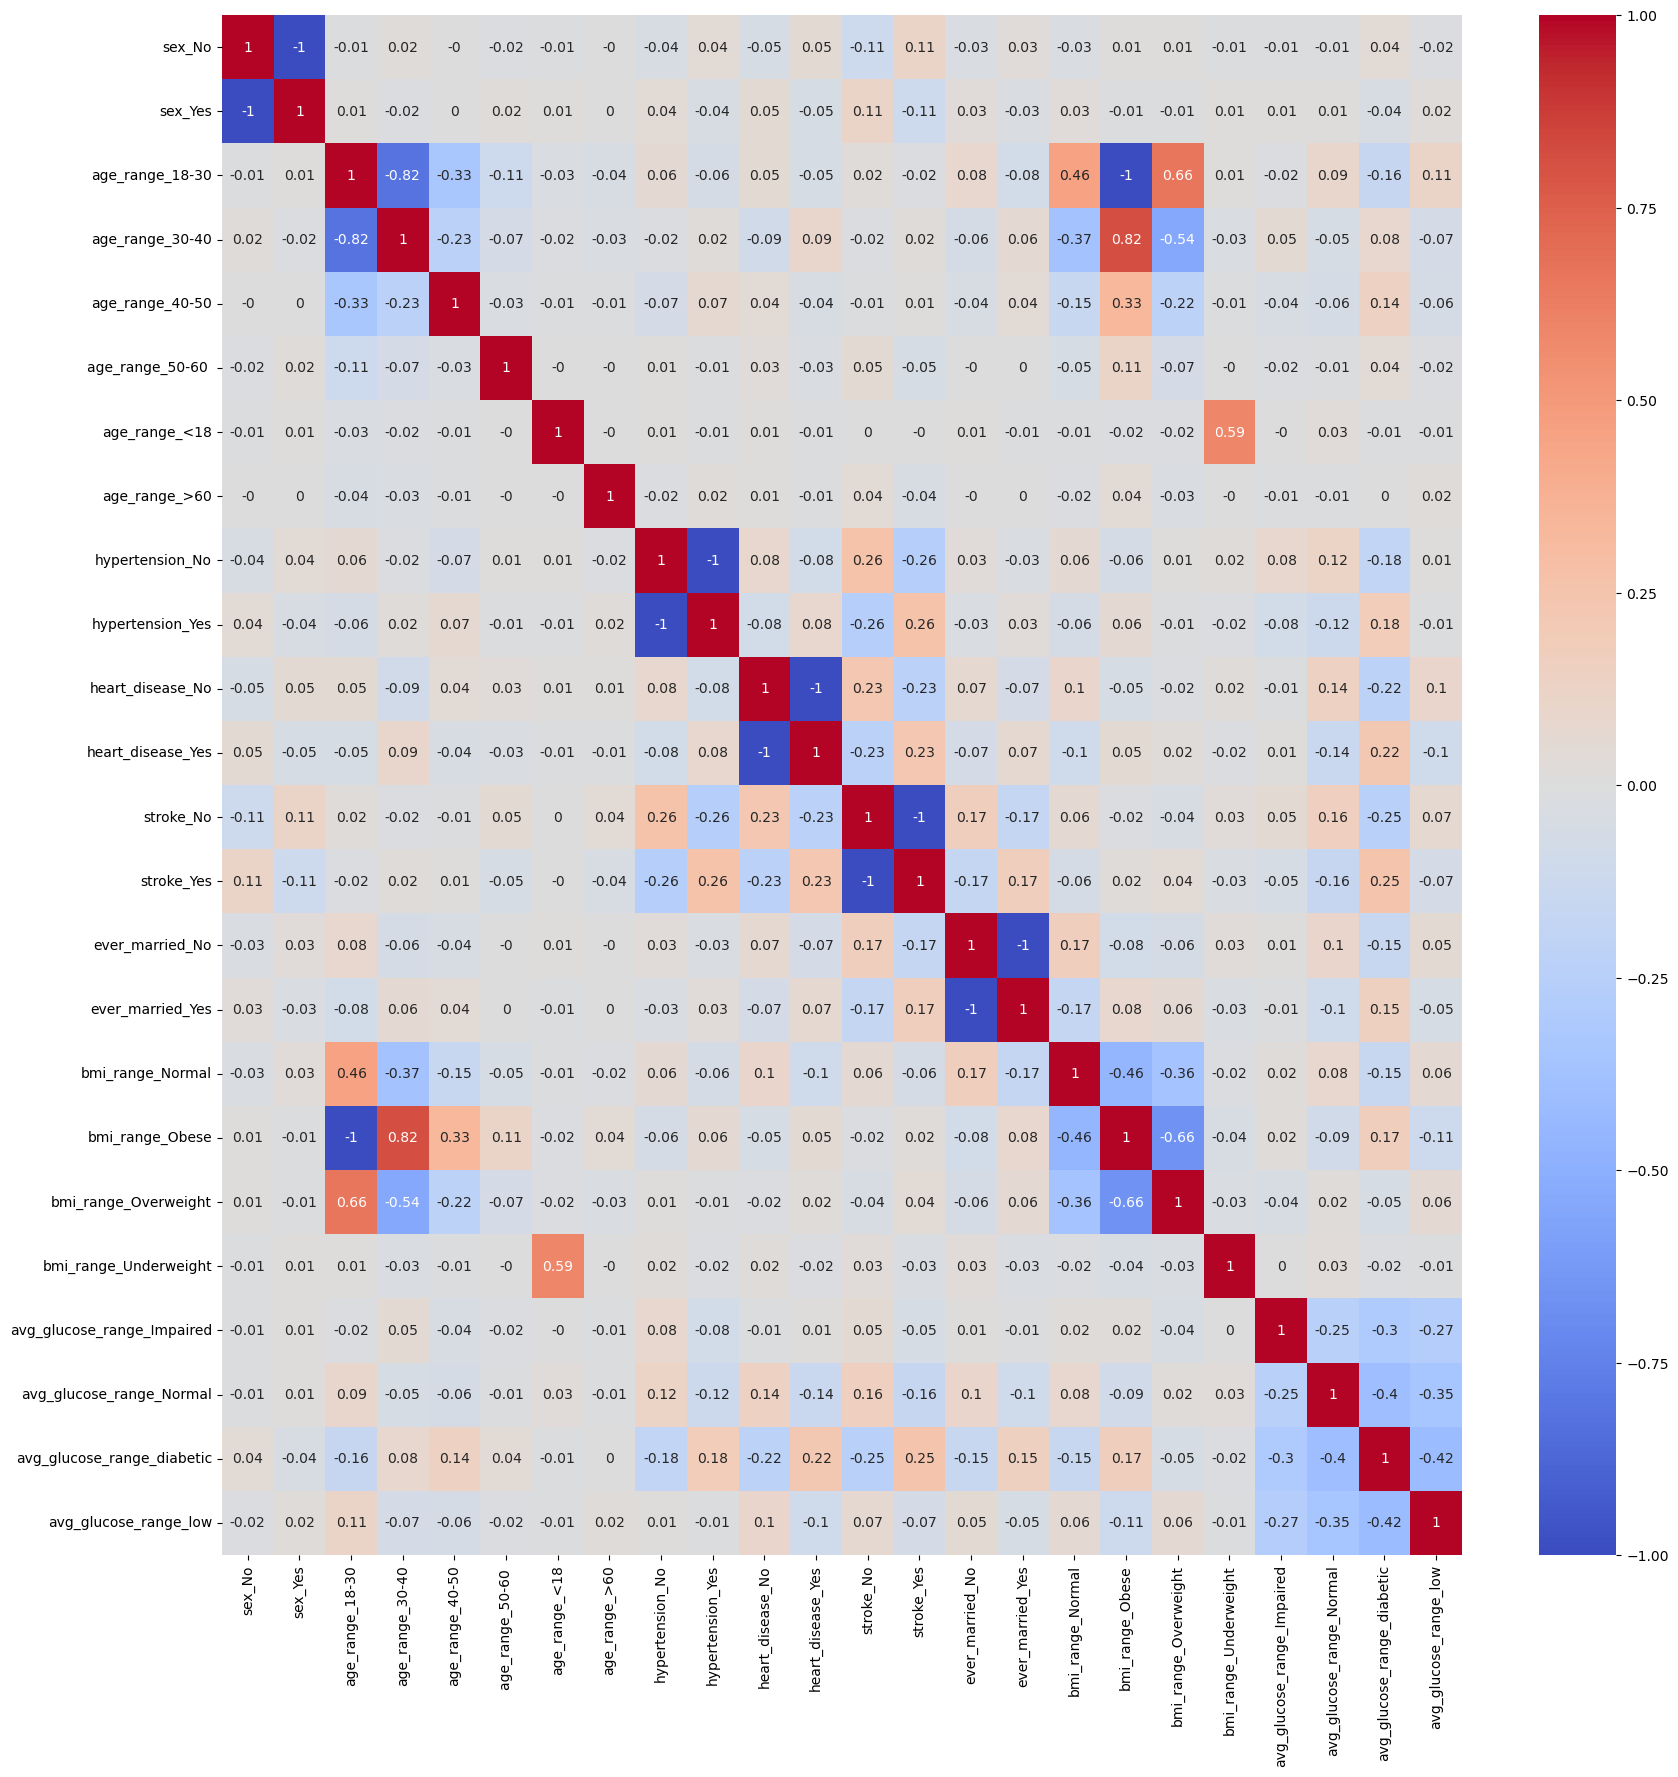

In [77]:
plt.figure(figsize=(20,20))

sns.heatmap(df_enc.corr().round(2), annot=True, cmap='coolwarm');

In [104]:
y=df_enc['stroke_Yes']
X=df_enc.drop('stroke_Yes',axis=1)
X.shape,y.shape

((39842, 23), (39842,))

# Regression
---

`make_regression` is an excellent library for generating a random regression problem. This helps us focus on the model without having to worry about the dataset. 

In the cell below, use `make_regression` to generate 10,000 samples using 20 features.

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [120]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [131]:
model = Sequential()

model.add(Dense(32,  # How many neurons in Hidden Layer 1
                input_shape = (23,), activation = 'relu'))
#model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [132]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                768       
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [133]:
X_train_sc.shape, y_train.shape

((29881, 23), (29881,))

In [134]:
model.compile(loss='mse', optimizer = 'adam', metrics=['mae'])

In [135]:
model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size = 512)

Epoch 1/10
59/59 [==============================] - 1s 6ms/step - loss: 0.4936 - mae: 0.5280 - val_loss: 0.0846 - val_mae: 0.2129
Epoch 2/10
59/59 [==============================] - 0s 3ms/step - loss: 0.0425 - mae: 0.1481 - val_loss: 0.0225 - val_mae: 0.1072
Epoch 3/10
59/59 [==============================] - 0s 3ms/step - loss: 0.0163 - mae: 0.0895 - val_loss: 0.0116 - val_mae: 0.0736
Epoch 4/10
59/59 [==============================] - 0s 3ms/step - loss: 0.0092 - mae: 0.0647 - val_loss: 0.0073 - val_mae: 0.0571
Epoch 5/10
59/59 [==============================] - 0s 3ms/step - loss: 0.0063 - mae: 0.0528 - val_loss: 0.0053 - val_mae: 0.0489
Epoch 6/10
59/59 [==============================] - 0s 3ms/step - loss: 0.0047 - mae: 0.0457 - val_loss: 0.0043 - val_mae: 0.0428
Epoch 7/10
59/59 [==============================] - 0s 3ms/step - loss: 0.0039 - mae: 0.0404 - val_loss: 0.0036 - val_mae: 0.0388
Epoch 8/10
59/59 [==============================] - 0s 3ms/step - loss: 0.0033 - mae: 0.03

In [136]:
model.predict(X_test_sc)

312/312 [==============================] - 1s 1ms/step


array([[-0.00803829],
       [-0.00786612],
       [ 0.02446279],
       ...,
       [ 0.99881387],
       [ 0.01772131],
       [ 0.97759527]], dtype=float32)

# Binary Classification
---

`make_classification` is similar to `make_regression`, except now we're predicting a class (0 or 1).

In the cell below, use `make_classification` to generate 10,000 samples using 20 features.

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [138]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [140]:
model = Sequential()
model.add(Dense(32,
                input_shape=(23,),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid is for output activation

In [141]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                768       
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.compile(loss = 'binary_crossentropy', metrics=['acc'], optimizer = 'adam')

In [143]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test),
                   epochs=30, batch_size = 512)

Epoch 1/30
59/59 [==============================] - 1s 6ms/step - loss: 0.5474 - acc: 0.7488 - val_loss: 0.4186 - val_acc: 0.9309
Epoch 2/30
59/59 [==============================] - 0s 3ms/step - loss: 0.3455 - acc: 0.9491 - val_loss: 0.2703 - val_acc: 0.9688
Epoch 3/30
59/59 [==============================] - 0s 3ms/step - loss: 0.2160 - acc: 0.9824 - val_loss: 0.1630 - val_acc: 0.9933
Epoch 4/30
59/59 [==============================] - 0s 3ms/step - loss: 0.1295 - acc: 0.9970 - val_loss: 0.0982 - val_acc: 1.0000
Epoch 5/30
59/59 [==============================] - 0s 3ms/step - loss: 0.0793 - acc: 1.0000 - val_loss: 0.0621 - val_acc: 1.0000
Epoch 6/30
59/59 [==============================] - 0s 3ms/step - loss: 0.0518 - acc: 1.0000 - val_loss: 0.0420 - val_acc: 1.0000
Epoch 7/30
59/59 [==============================] - 0s 3ms/step - loss: 0.0358 - acc: 1.0000 - val_loss: 0.0296 - val_acc: 1.0000
Epoch 8/30
59/59 [==============================] - 0s 3ms/step - loss: 0.0255 - acc: 1.00

In [144]:
history

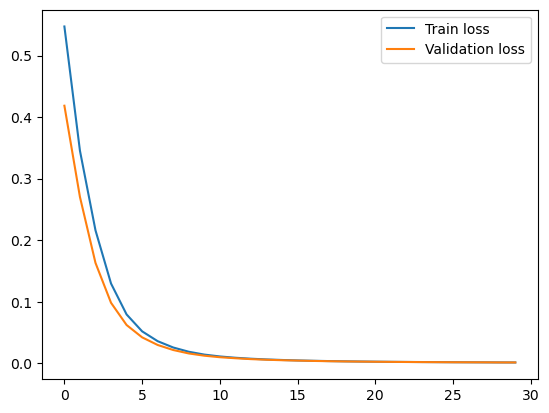

In [145]:
# history.history
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend();

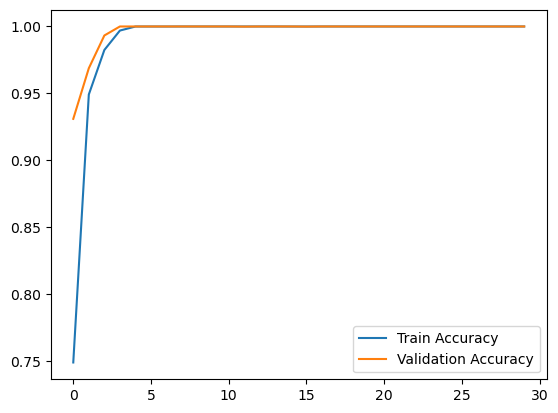

In [146]:
# history.history
plt.plot(history.history['acc'], label = "Train Accuracy")
plt.plot(history.history['val_acc'], label = "Validation Accuracy")
plt.legend();

# Multi-class Classification
---

The `make_classification` function allows for multi-class problems as well. Simply increase the `n_classes` and voila!

**NOTE**: You'll need to increase `n_informative` as you increase `n_classes`.

In the cell below, let's create a dataset with three classes.

In [205]:
df_easy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           40910 non-null  float64
 1   bmi           40910 non-null  float64
 2   hypertension  40910 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 959.0 KB


In [236]:
y=df_easy['hypertension']
X=df_easy.drop('hypertension',axis=1)
X.shape,y.shape

((40562, 2), (40562,))

In [237]:
X, y = make_classification(n_samples=10_000, n_features=20, n_classes=3, random_state=42, 
                           n_informative=4 )

In [238]:
y[:5]

array([2, 2, 1, 0, 2])

In [239]:
from tensorflow.keras.utils import to_categorical

In [240]:
y = to_categorical(y)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [242]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [243]:
model = Sequential()
model.add(Dense(32, 
                input_shape=(20,),
                activation='relu'))
model.add(Dense(3, activation='softmax'))

In [244]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [245]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=512)

Epoch 1/30
15/15 [==============================] - 1s 14ms/step - loss: 1.2248 - accuracy: 0.3675 - val_loss: 1.1586 - val_accuracy: 0.3976
Epoch 2/30
15/15 [==============================] - 0s 5ms/step - loss: 1.1133 - accuracy: 0.4227 - val_loss: 1.0669 - val_accuracy: 0.4620
Epoch 3/30
15/15 [==============================] - 0s 5ms/step - loss: 1.0376 - accuracy: 0.4771 - val_loss: 1.0027 - val_accuracy: 0.5124
Epoch 4/30
15/15 [==============================] - 0s 5ms/step - loss: 0.9829 - accuracy: 0.5257 - val_loss: 0.9543 - val_accuracy: 0.5608
Epoch 5/30
15/15 [==============================] - 0s 5ms/step - loss: 0.9397 - accuracy: 0.5655 - val_loss: 0.9155 - val_accuracy: 0.6004
Epoch 6/30
15/15 [==============================] - 0s 5ms/step - loss: 0.9042 - accuracy: 0.5960 - val_loss: 0.8830 - val_accuracy: 0.6180
Epoch 7/30
15/15 [==============================] - 0s 5ms/step - loss: 0.8728 - accuracy: 0.6181 - val_loss: 0.8547 - val_accuracy: 0.6388
Epoch 8/30
15/15 [=

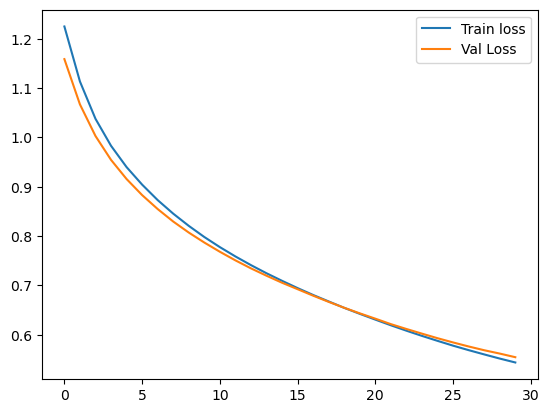

In [246]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

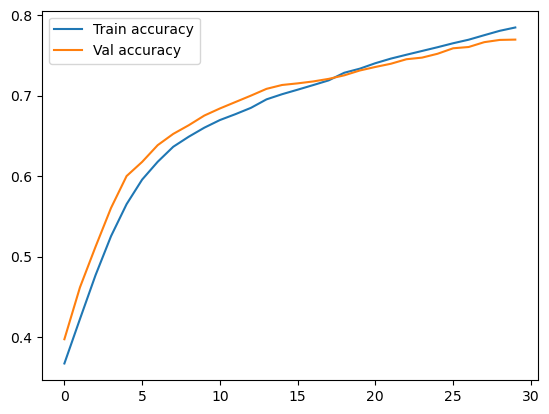

In [247]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend();

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [326]:
df = df.dropna()

In [327]:
y=df['hypertension']
X=df[['age', 'bmi']]
X.shape,y.shape

((40907, 2), (40907,))

In [328]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [329]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32725, 2), (8182, 2), (32725,), (8182,))

In [330]:
lg=LogisticRegression(max_iter = 10000)
lg.fit(X_train,y_train)

print('weights: ')
print(lg.coef_)
print('Intercept: ')
print(lg.intercept_)

weights: 
[[0.00197599 0.02863941]]
Intercept: 
[-2.28266334]


In [331]:
#Predict training set:
y_pred = lg.predict(X_test)
    
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6448    0]
 [1731    3]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6448
           1       1.00      0.00      0.00      1734

    accuracy                           0.79      8182
   macro avg       0.89      0.50      0.44      8182
weighted avg       0.83      0.79      0.70      8182



In [332]:
CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [333]:
result=pd.DataFrame()
# Sensitivity, hit rate, recall, or true positive rate
result['TPR'] = [round(TP/(TP+FN),2)]
 # Specificity or true negative rate
result['TNR'] = [round(TN/(TN+FP),2) ]
        # Fall out or false positive rate
result['FPR'] = [round(FP/(FP+TN),2)]
         # False negative rate
result['FNR'] = [round(FN/(TP+FN),2)]

lg_probs = lg.predict_proba(X_test)
        # keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]
result['AUC'] = [round(roc_auc_score(y_test, lg_probs),2)]
result

,TPR,TNR,FPR,FNR,AUC
0,0.0,1.0,0.0,1.0,0.55


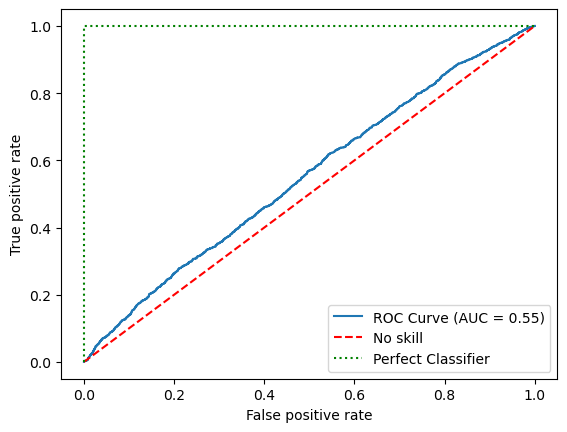

In [334]:
gbc_auc = roc_auc_score(y_test, lg_probs)
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, lg_probs)
plt.plot(gbc_fpr, gbc_tpr, label='ROC Curve (AUC = %0.2f)' % (gbc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='No skill')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [350]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [348]:
from sklearn.naive_bayes import MultinomialNB

In [355]:
from sklearn.preprocessing import MinMaxScaler

In [356]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [363]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [364]:
forest_frax = RandomForestClassifier(n_estimators=50,max_features=6,max_depth=15)
Forest_frax=forest_frax.fit(X_train, y_train)

frax_pred = Forest_frax.predict(X)
frax_prob = Forest_frax.predict_proba(X)[:,1]

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [365]:
#Predict training set:
y_pred = Forest_frax.predict(X_test)
    
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6089  359]
 [1024  710]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6448
           1       0.66      0.41      0.51      1734

    accuracy                           0.83      8182
   macro avg       0.76      0.68      0.70      8182
weighted avg       0.82      0.83      0.82      8182



In [366]:
CM = confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [367]:
result=pd.DataFrame()
# Sensitivity, hit rate, recall, or true positive rate
result['TPR'] = [round(TP/(TP+FN),2)]
 # Specificity or true negative rate
result['TNR'] = [round(TN/(TN+FP),2) ]
        # Fall out or false positive rate
result['FPR'] = [round(FP/(FP+TN),2)]
         # False negative rate
result['FNR'] = [round(FN/(TP+FN),2)]

lg_probs = lg.predict_proba(X_test)
        # keep probabilities for the positive outcome only
lg_probs = lg_probs[:, 1]
result['AUC'] = [round(roc_auc_score(y_test, lg_probs),2)]
result

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,TPR,TNR,FPR,FNR,AUC
0,0.41,0.94,0.06,0.59,0.55


In [369]:
bc_auc = roc_auc_score(y_test, frax_prob)
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, frax_prob)
plt.plot(gbc_fpr, gbc_tpr, label='ROC Curve (AUC = %0.2f)' % (gbc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='No skill')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [8182, 40907]

In [ ]:
data = [[1.0,37.0,4.0,9.0,76.667,122.667,102.2,184.4,30.1,12.50,18.333]]
data_pred = model.predict(data)
data_pred

In [339]:
# case one by age
case = pd.DataFrame(
   {"bmi":[2]
   }
)
case=pd.concat([case]*60)
case.insert(0,'age',range(20,20+len(case)))

In [340]:
probs = lg.predict_proba(case)
prediction=probs[:, 1]

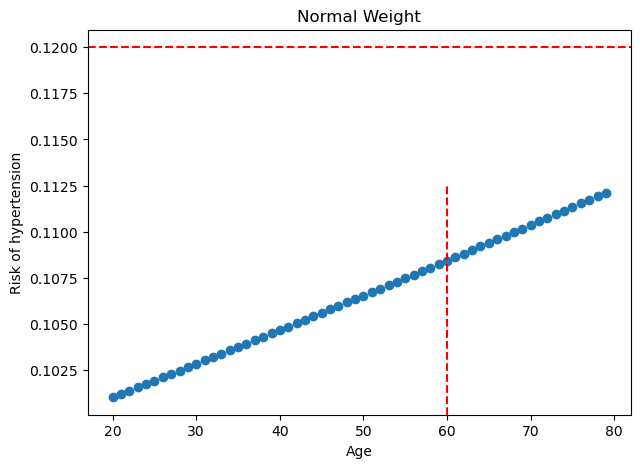

In [345]:
plt.figure(figsize=(7,5))
plt.scatter(case['age'],prediction)
plt.axhline(y=0.12,xmin=0, xmax=59, color='r',linestyle='--')
plt.axvline(x=60, ymin=0, ymax=0.6, color='r',linestyle='--')
plt.title("Normal Weight")
plt.xlabel("Age")
plt.ylabel("Risk of hypertension")
plt.show() 

In [269]:
# case one by age
case_new = pd.DataFrame(
   {"age":[65],
       "bmi":[4]
   }
)

lg.predict_proba(case_new)[:, 1]

array([0.11548199])

In [116]:
#create KNN imputer object
knn_imp = KNNImputer(n_neighbors=5)
X_imputed = knn_imp.fit_transform(X)

In [118]:
num_ct = ColumnTransformer([
    (StandardScaler())
], remainder='passthrough')
X_scaled = num_ct.fit_transform(X_imputed)

TypeError: StandardScaler.__init__() takes 1 positional argument but 2 were given

In [82]:
import tensorflow as tf

In [83]:
from imblearn.over_sampling import SMOTE

In [106]:
sm = SMOTE()

In [107]:
X_bal, y_bal = sm.fit_resample(X_train, y_train)

In [89]:
model = GradientBoostingClassifier()

In [91]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
importances = list(model.feature_importances_)

In [95]:
pipe =  Pipeline([('GradientBoostingClassifier', GradientBoostingClassifier())])
param_grid = {
                  'GradientBoostingClassifier__n_estimators': [5,50,250,500], 
                  'GradientBoostingClassifier__max_depth': [3,5,7,9], 
                  'GradientBoostingClassifier__learning_rate': [0.01,0.1,1,10,100]
             }

gbc_model_grid = GridSearchCV(pipe, param_grid, cv=10, n_jobs=10, scoring='roc_auc')
gbc_model_grid.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('GradientBoostingClassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=10,
             param_grid={'GradientBoostingClassifier__learning_rate': [0.01,
                                                                       0.1, 1,
                                                                       10,
                                                                       100],
                         'GradientBoostingClassifier__max_depth': [3, 5, 7, 9],
                         'GradientBoostingClassifier__n_estimators': [5, 50,
                                                                      250,
                                                                      500]},
             scoring='roc_auc')

In [124]:
from tensorflow.keras import layers, models #neural network architecture
from tensorflow.keras.callbacks import EarlyStopping #regularization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras #keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf #tensorflow

In [102]:
#builds the architecture for a neural network
#creates a dense network with 1 skip step
inputs = keras.Input(shape=(21,))
a = layers.Dense(64, activation='relu')(inputs)
x = layers.Dropout(0.6)(a)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.concatenate([a, x])
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.6)(x)
output = layers.Dense(1, activation='sigmoid')(x)

nn = keras.Model(inputs, output, name="stroke_predictor")
nn.summary()

Model: "stroke_predictor"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 21)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           1408        ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 64)           0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 128)          8320        ['dropout[0][0]']                
                                                                                   

In [169]:
#compiles the model with Adam optimizer
nn.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
            loss='binary_crossentropy', metrics=['accuracy'])
early_stopper = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

#Trains the neural network
history = nn.fit(X_bal, y_bal, epochs=1000, callbacks=[early_stopper], validation_data=(X_test, y_test), verbose=0)

ValueError: in user code:

    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "stroke_predictor" is incompatible with the layer: expected shape=(None, 21), found shape=(None, 23)
